In [20]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# Prepare Data

In [21]:
# read data
spectrum_train = pd.read_excel('spectrum_train.xlsx')
spectrum_test = pd.read_excel('spectrum_valid.xlsx')
temp_train = pd.read_excel('temp_train.xlsx')
temp_test = pd.read_excel('temp_valid.xlsx')

In [22]:
# scale spectrum data
scale = 10**12
spectrum_train = spectrum_train.multiply(scale)
spectrum_test = spectrum_test.multiply(scale)

In [23]:
from sklearn.model_selection import train_test_split
# set train and test data

# 1 - temp to spectrum
# 0 - spectrum to temp
direction = 0

# use only if split == 1
# 1 - combine given training and validation data
# 0 - use only training data
combine = 0

if not combine:
    if direction:
        X_train = temp_train
        X_test = temp_test
        y_train = spectrum_train
        y_test = spectrum_test
    else:
        X_train = spectrum_train
        X_test = spectrum_test
        y_train = temp_train
        y_test = temp_test
else:
    spectrum = pd.concat([spectrum_train, spectrum_test], axis=0)
    temp = pd.concat([temp_train, temp_test], axis=0)
    if direction:
        X_train, X_test, y_train, y_test = train_test_split(temp, spectrum, test_size=0.3, random_state=101)
    else:
        X_train, X_test, y_train, y_test = train_test_split(spectrum, temp, test_size=0.3, random_state=101)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
pred = model.predict(X_test)

In [26]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test, pred))
print('MSE: ', metrics.mean_squared_error(y_test, pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE:  0.002100769668606352
MSE:  2.18585233757717e-05
RMSE:  0.004675309976437039


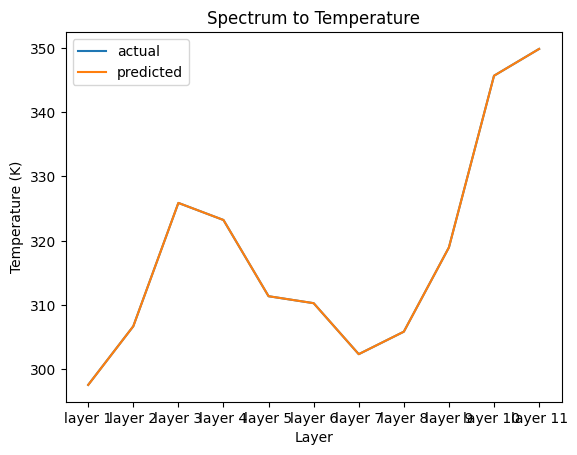

In [30]:
import matplotlib.pyplot as plt
import random

index = random.randint(0, len(pred))

actual_np = y_test.values[index]
pred_np = pred[index]


plt.plot(y_train.columns, actual_np, label='actual')
plt.plot(y_train.columns, pred_np,  label='predicted')

if direction:
    plt.title("Temperature to Spectrum")
    plt.xlabel("Wavlength")
    plt.ylabel("Intensity")
else:
    plt.title("Spectrum to Temperature")
    plt.xlabel("Layer")
    plt.ylabel("Temperature (K)")

plt.legend()
plt.show()

In [31]:
actual_np

array([297.59605927, 306.71016002, 325.88886644, 323.23340805,
       311.37997347, 310.29896004, 302.37125081, 305.86802927,
       318.97122524, 345.66464848, 349.8347472 ])

In [32]:
pred_np

array([297.58882167, 306.71014529, 325.88856013, 323.23503709,
       311.3819844 , 310.29912642, 302.37049241, 305.86843748,
       318.97105571, 345.66455854, 349.83475115])